<a href="https://colab.research.google.com/github/Hemant4623/Prodigy_DS_03/blob/main/task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Import necessary libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree


2) Load the Dataset

In [9]:

data = pd.read_csv('bank-full.csv', sep=';')

# Display the first few rows of the dataset
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


3: Data Preprocessing

Check for missing values

In [10]:
print(data.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


 Encode categorical variables using one-hot encoding

In [11]:
data_encoded = pd.get_dummies(data, drop_first=True)


 4) Exploratory Data Analysis (EDA)

Summary statistics

In [12]:
print(data.describe())


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

Correlation matrix


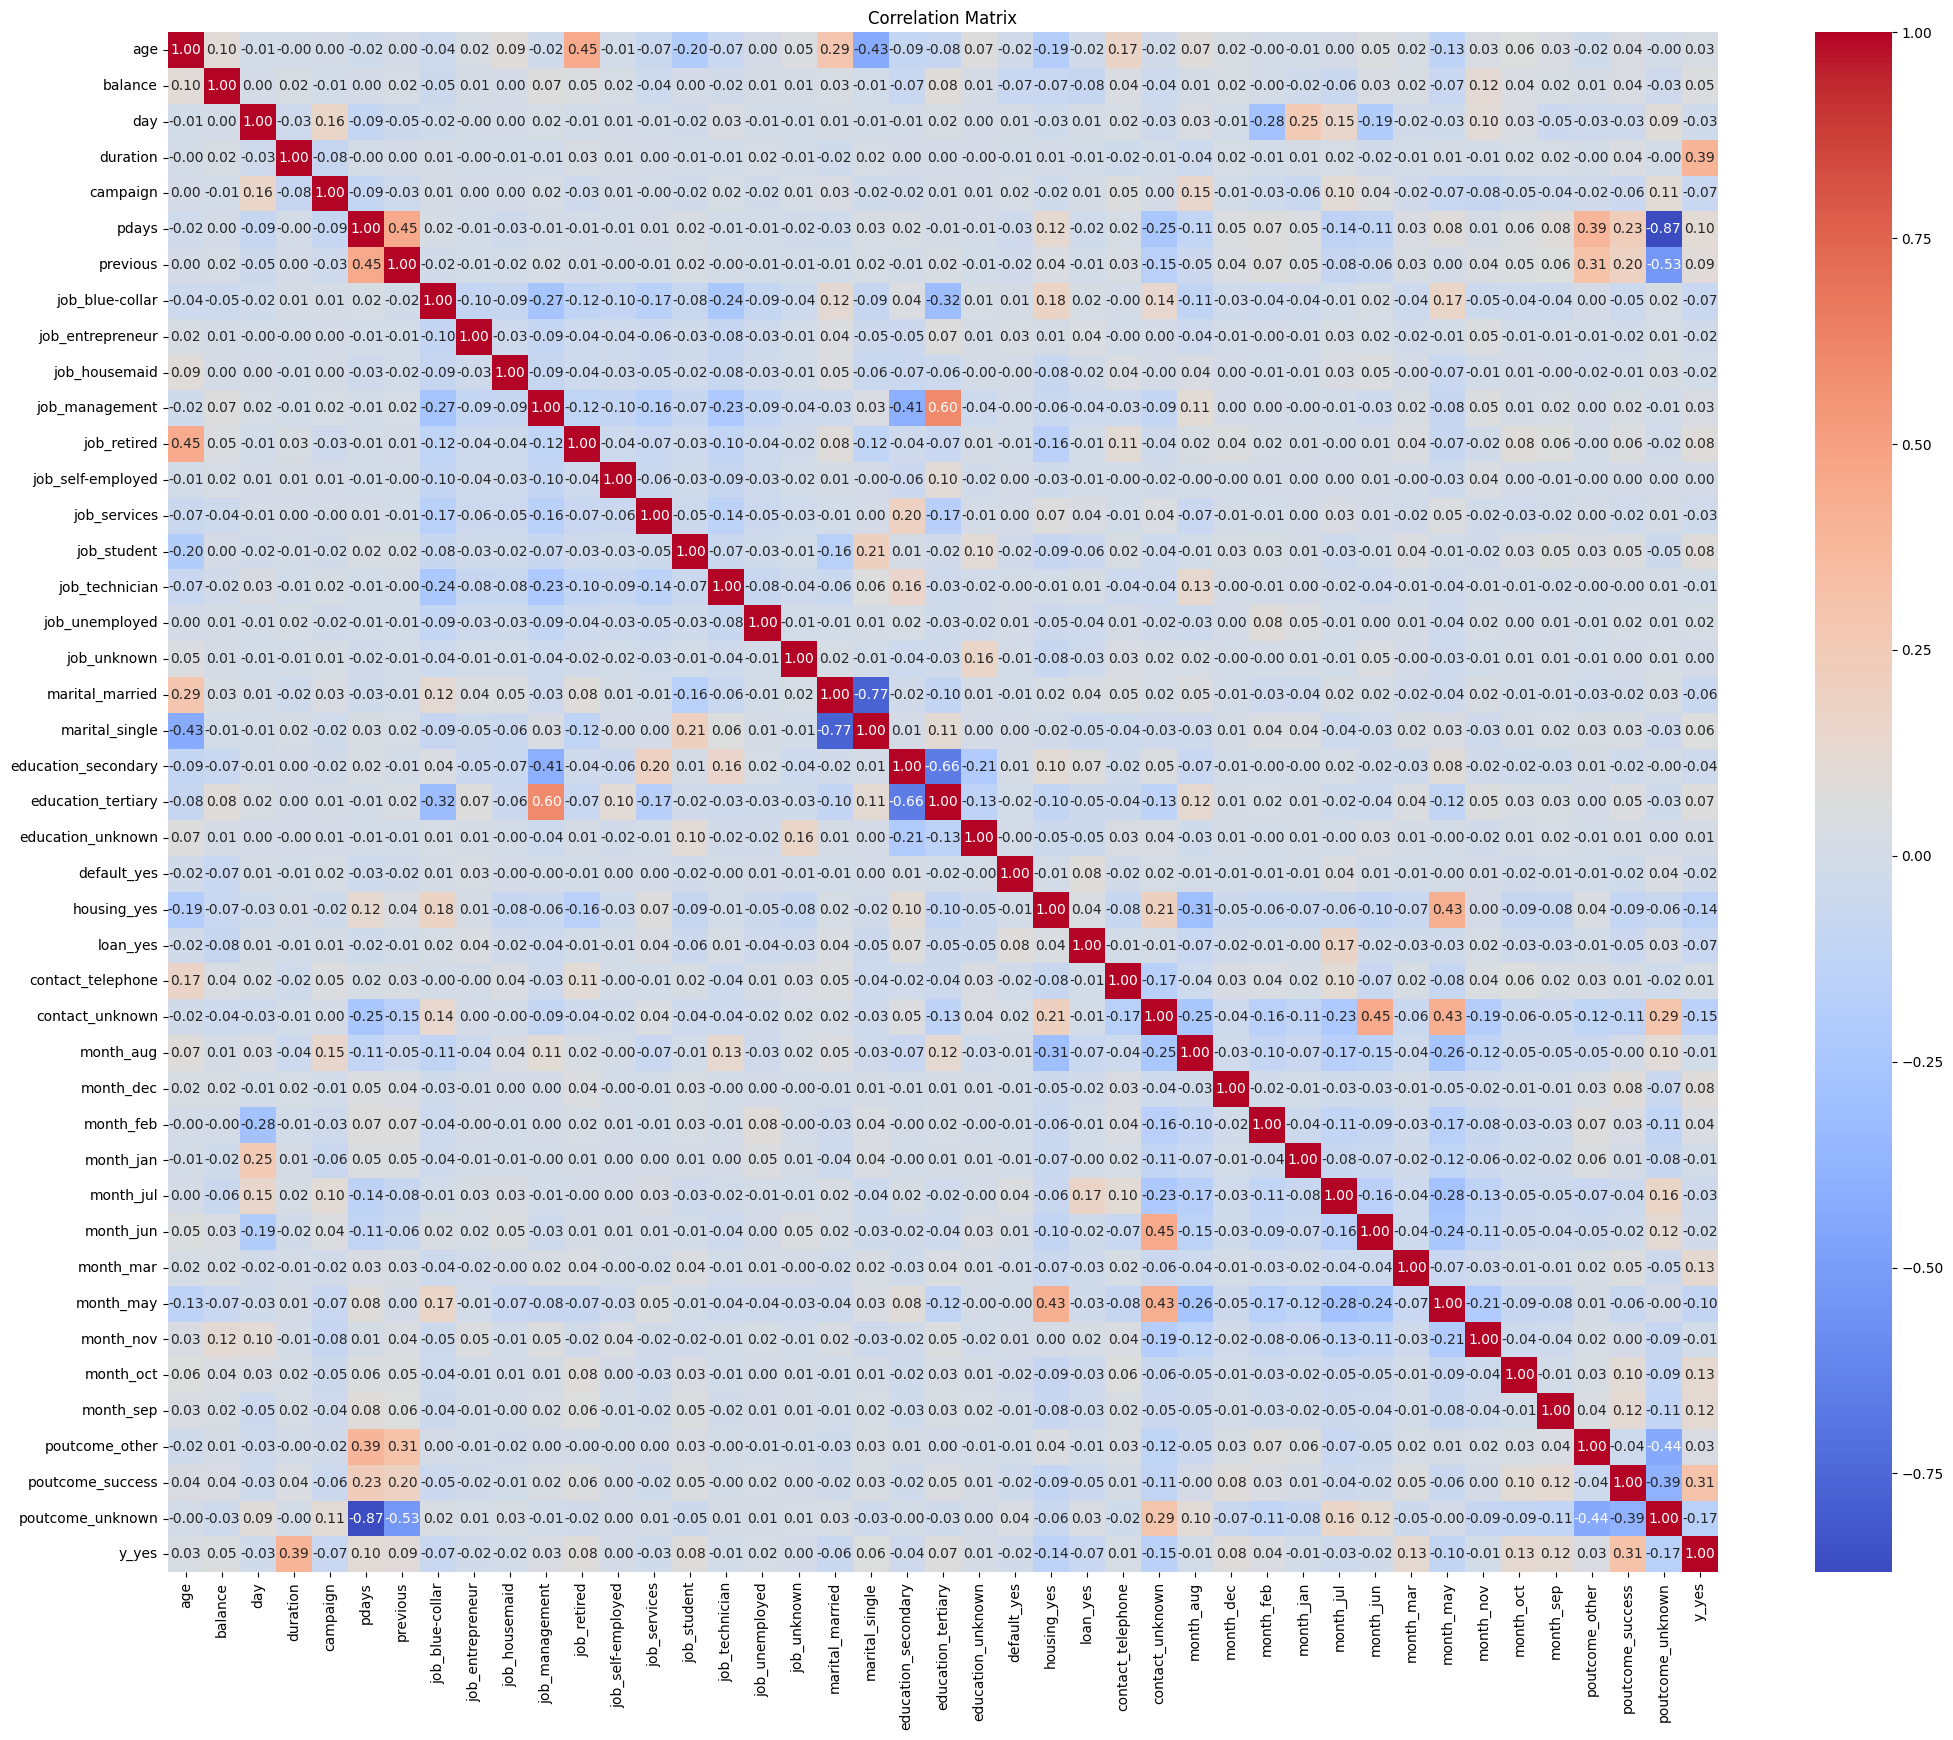

In [14]:
plt.figure(figsize=(25, 20))
sns.heatmap(data_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Visualize distributions

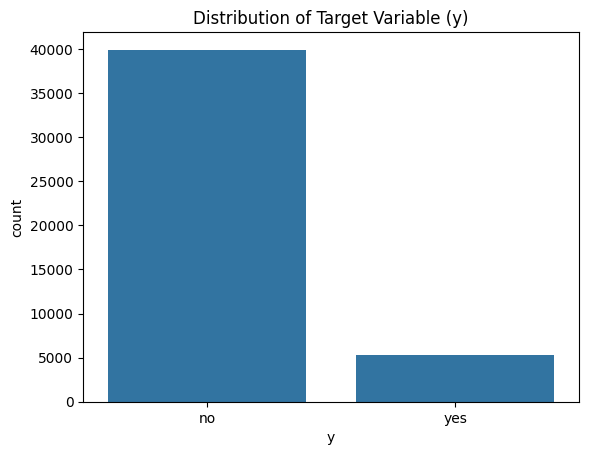

In [15]:
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (y)')
plt.show()


 5) Split the Data

 Split the data into features and target variable

In [16]:
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


6) Build the Decision Tree Classifier

Initialize the classifier

In [17]:
clf = DecisionTreeClassifier(random_state=42)

Train the classifier

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

7) Evaluate the Model

Make predictions:

In [19]:
y_pred = clf.predict(X_test)

Model evaluation metrics

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[11086   880]
 [  856   742]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564

Accuracy: 87.20%


8) Visualize the Decision Tree

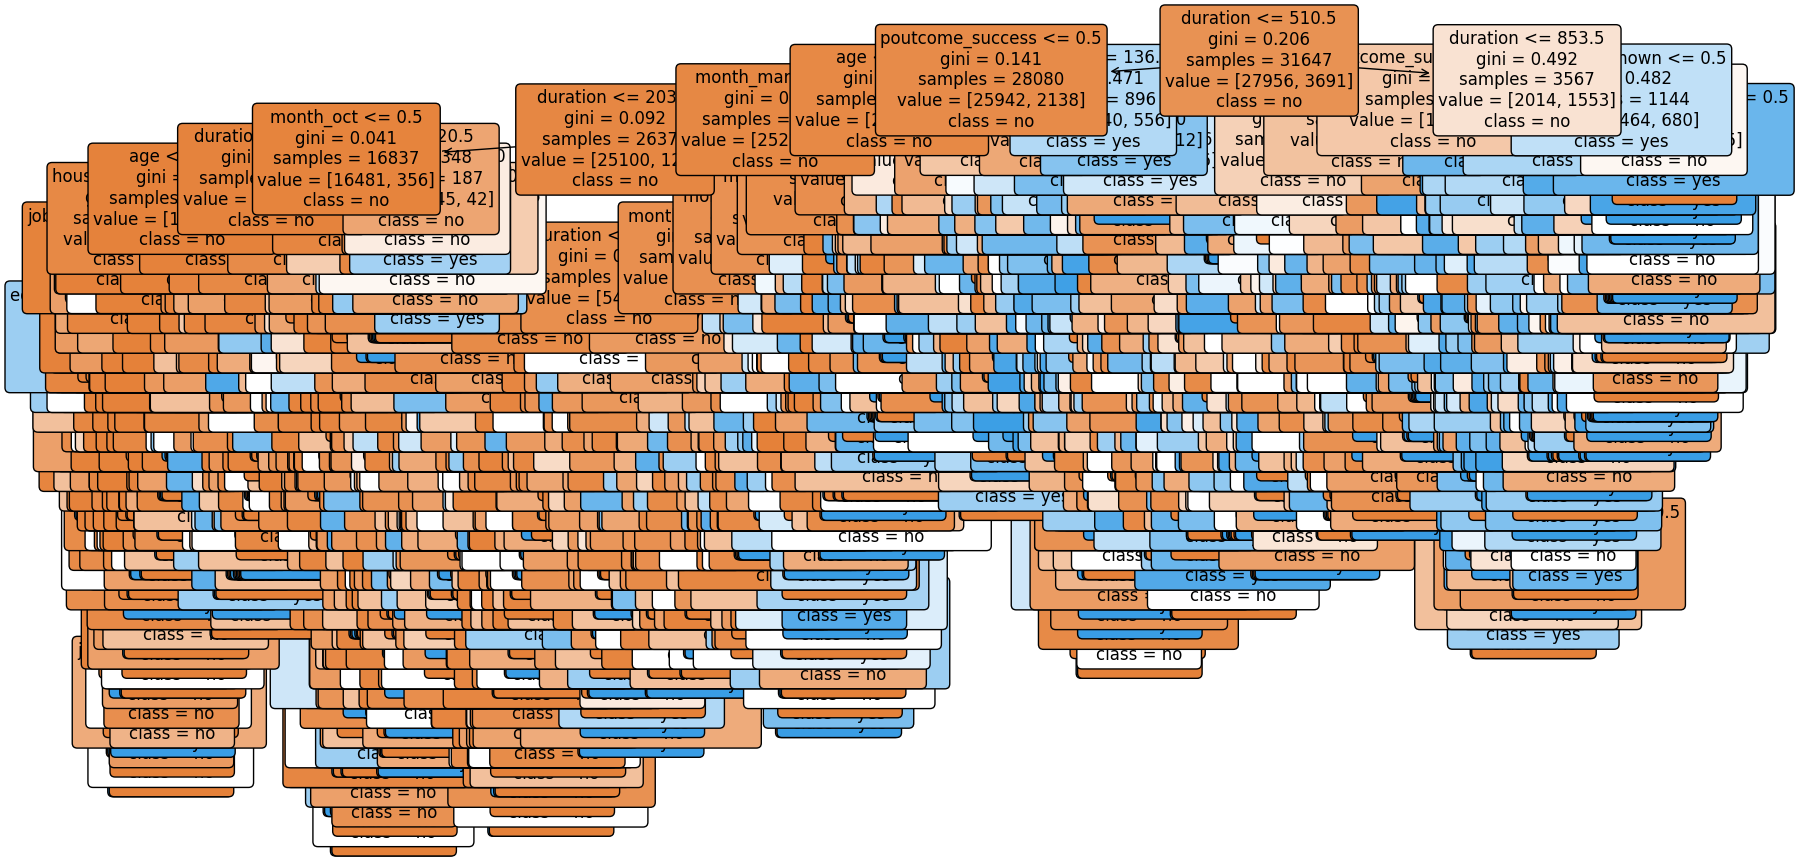

In [21]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True, fontsize=12)
plt.show()
